In [96]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
import joblib
#warnings
import warnings
warnings.filterwarnings('ignore')

#***Load DataSet:-***

In [97]:
#load dataset
df=pd.read_csv('/content/apple_quality.csv')

In [98]:
df.head()

,A_id,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
0,0.0,-3.970049,-2.512336,5.346330,-1.012009,1.844900,0.329840,-0.491590483,good
1,1.0,-1.195217,-2.839257,3.664059,1.588232,0.853286,0.867530,-0.722809367,good
2,2.0,-0.292024,-1.351282,-1.738429,-0.342616,2.838636,-0.038033,2.621636473,bad
3,3.0,-0.657196,-2.271627,1.324874,-0.097875,3.637970,-3.413761,0.790723217,good
4,4.0,1.364217,-1.296612,-0.384658,-0.553006,3.030874,-1.303849,0.501984036,good


In [99]:
#shape of dataset
df.shape

(4001, 9)

#***EDA(Explotary Data Analysis):-***

In [100]:
#dataset information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4001 entries, 0 to 4000
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   A_id         4000 non-null   float64
 1   Size         4000 non-null   float64
 2   Weight       4000 non-null   float64
 3   Sweetness    4000 non-null   float64
 4   Crunchiness  4000 non-null   float64
 5   Juiciness    4000 non-null   float64
 6   Ripeness     4000 non-null   float64
 7   Acidity      4001 non-null   object 
 8   Quality      4000 non-null   object 
dtypes: float64(7), object(2)
memory usage: 281.4+ KB


In [101]:
#drop unncessary column
df=df.drop(columns=["A_id"],axis=1)

In [102]:
#check the dataset descrption
df.describe()

,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,-0.503015,-0.989547,-0.470479,0.985478,0.512118,0.498277
std,1.928059,1.602507,1.943441,1.402757,1.930286,1.874427
min,-7.151703,-7.149848,-6.894485,-6.055058,-5.961897,-5.864599
25%,-1.816765,-2.011770,-1.738425,0.062764,-0.801286,-0.771677
50%,-0.513703,-0.984736,-0.504758,0.998249,0.534219,0.503445
75%,0.805526,0.030976,0.801922,1.894234,1.835976,1.766212
max,6.406367,5.790714,6.374916,7.619852,7.364403,7.237837


In [103]:
#check the null values in rows
df.isna().sum()

,0
Size,1
Weight,1
Sweetness,1
Crunchiness,1
Juiciness,1
Ripeness,1
Acidity,0
Quality,1


In [104]:
#drop the null rows in dataset
df=df.dropna()

In [105]:
#duplicate check rows
df.duplicated().sum()

0

In [106]:
#check the shape of dataset
df.shape

(4000, 8)

In [107]:
df["Acidity"].unique()

array(['-0.491590483', '-0.722809367', '2.621636473', ..., '-1.334611391',
       '-2.229719806', '1.599796456'], dtype=object)

In [108]:
#convert the acidity column object to numerica column
df['Acidity'] = pd.to_numeric(df['Acidity'], errors='coerce')

In [109]:
#check the data type of Acidity column
df["Acidity"].dtypes

dtype('float64')

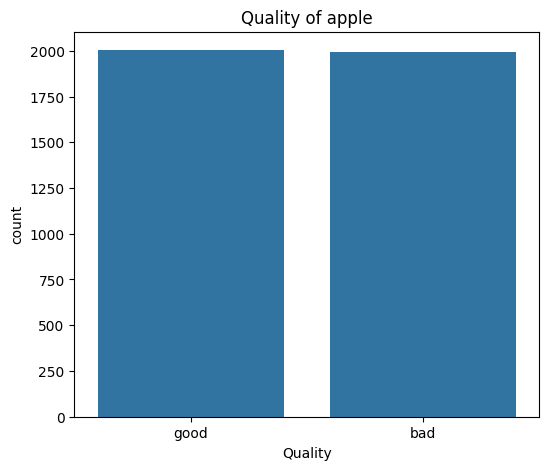

In [110]:
#Quality column count plot
plt.figure(figsize=(6,5))
sns.countplot(x="Quality",data=df)
plt.title("Quality of apple")
plt.show()

It has evenly distributed target values we are not going to do smote

<Figure size 1000x1000 with 0 Axes>

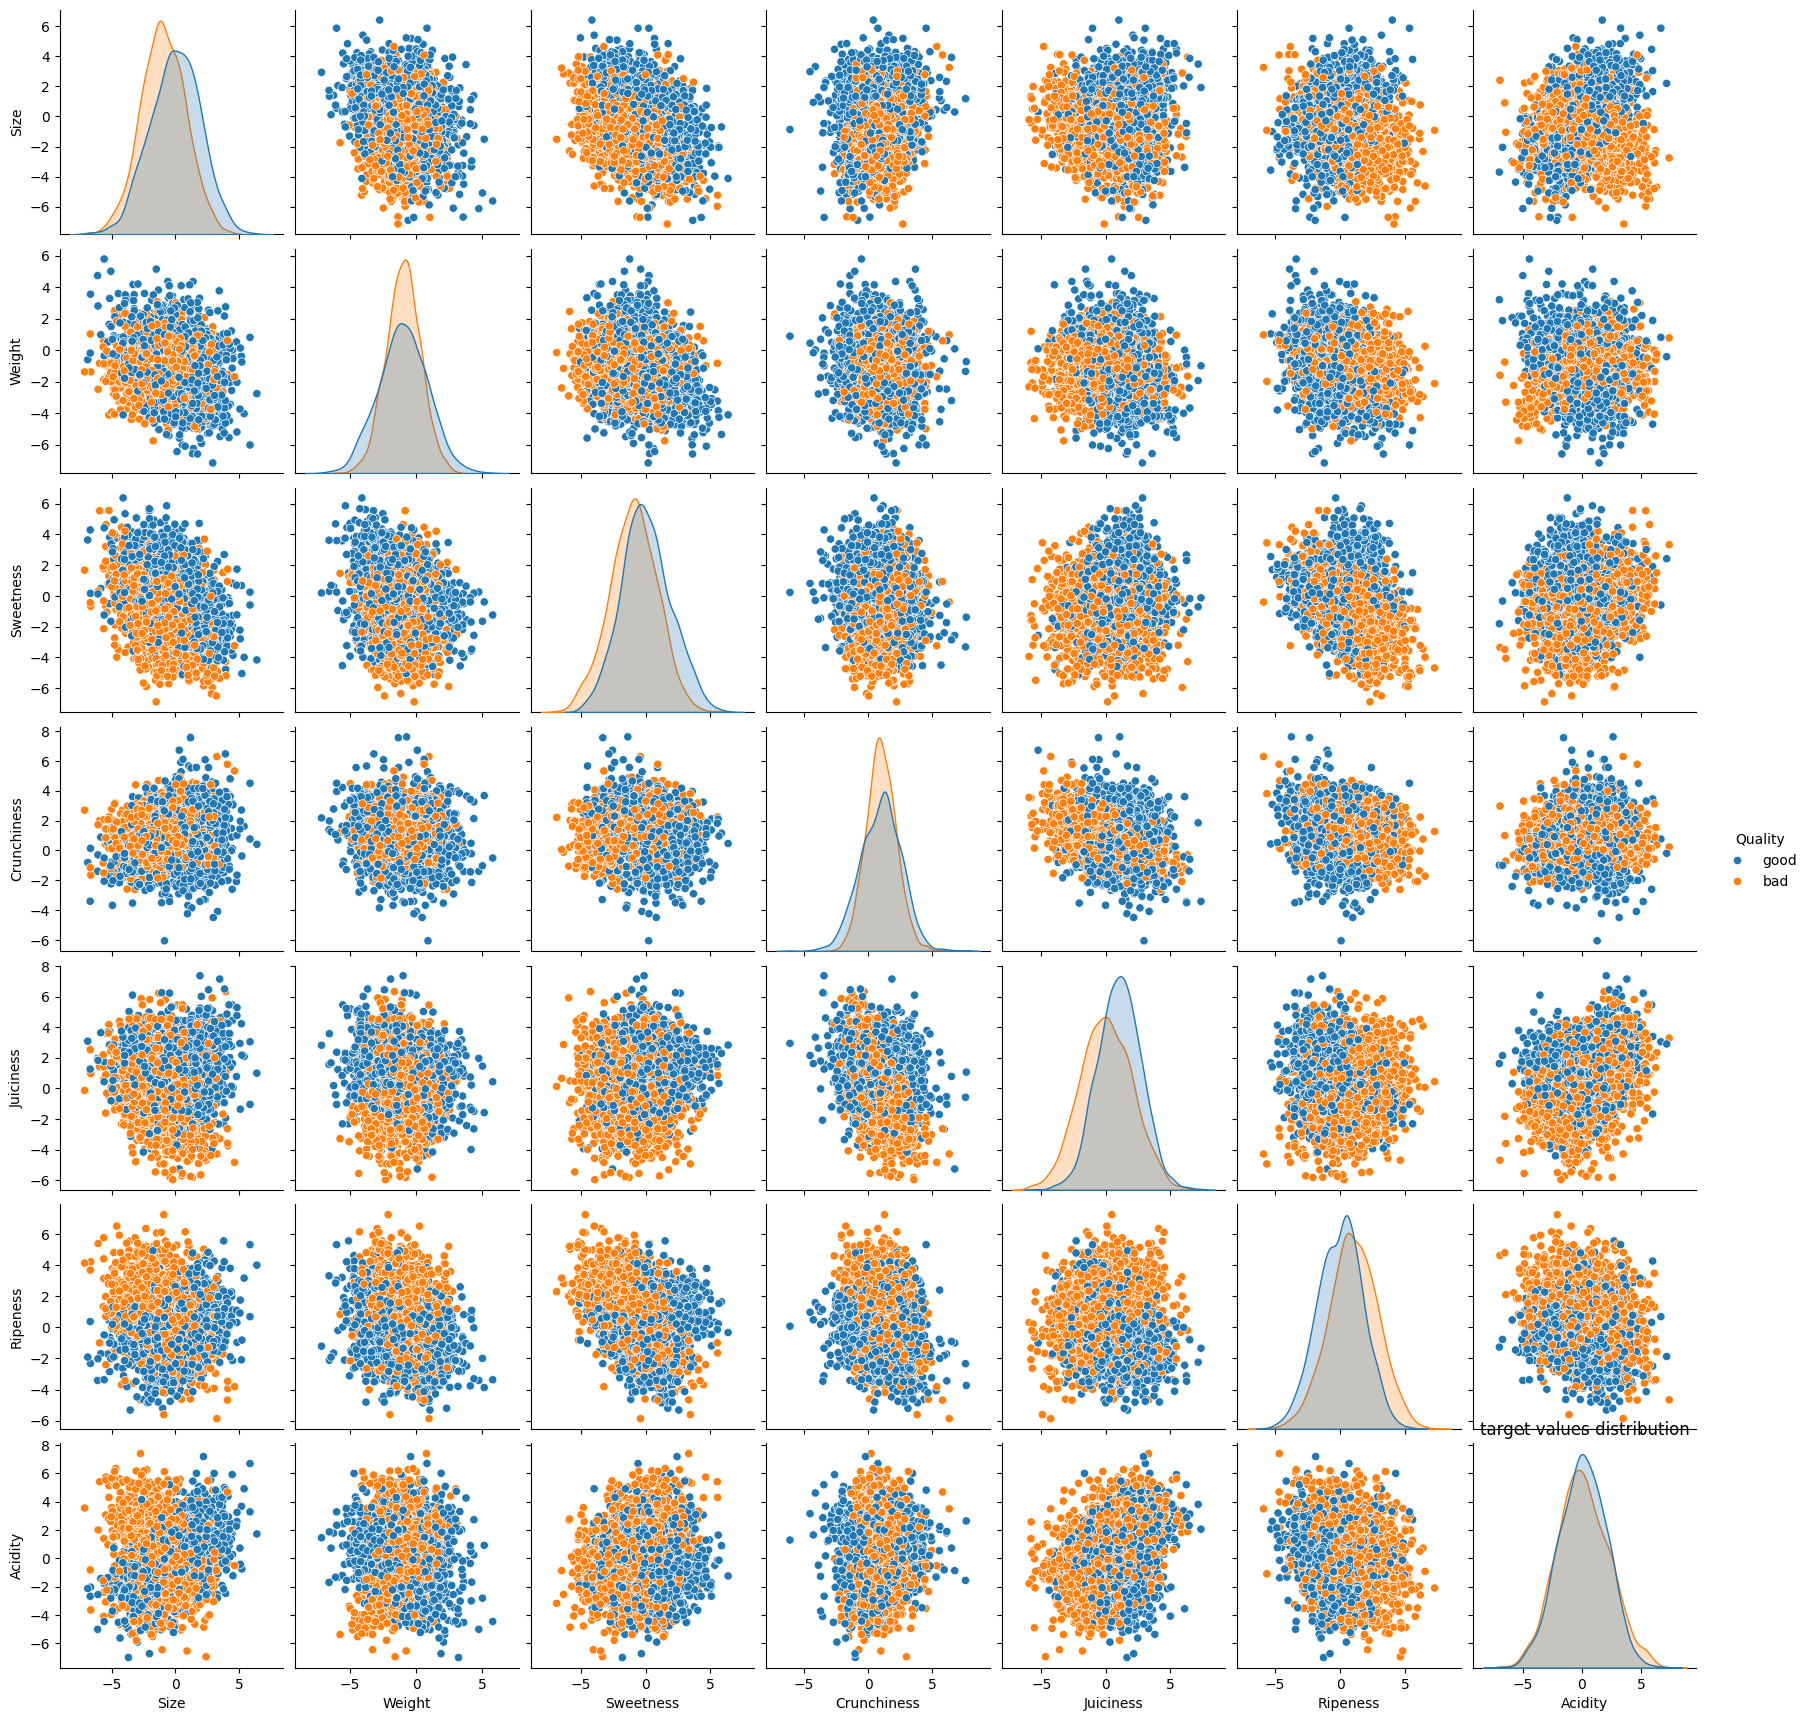

In [111]:
# Pairplot for feature relationships with target column
plt.figure(figsize=(10,10))
sns.pairplot(df, hue='Quality')
plt.title("target values distribution")
plt.show()

#**`convert Categorical column to numerical:-`**

In [112]:
df['Quality'].unique()

array(['good', 'bad'], dtype=object)

In [113]:
df["Quality"]=df['Quality'].map({'good':1,'bad':0})

#***correlation:-***
-Check the correlation with target column

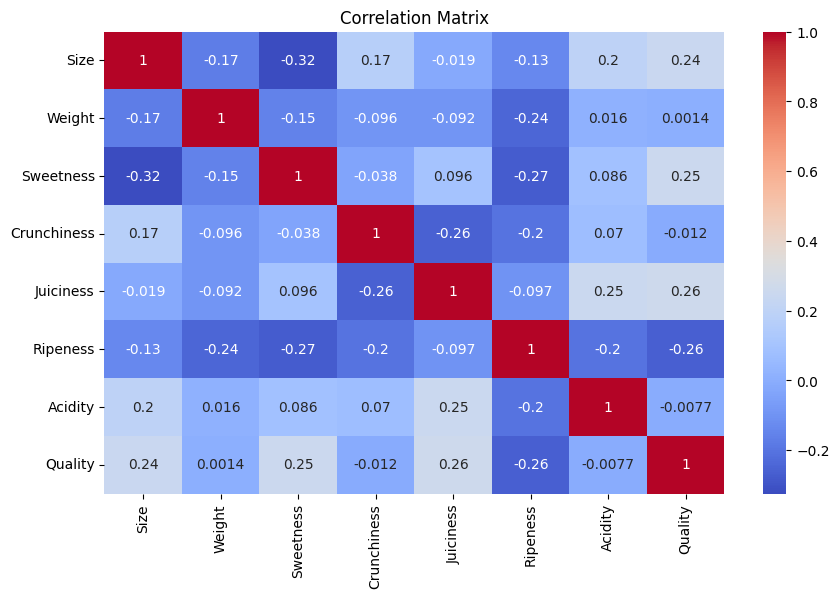

In [114]:
# Correlation matrix
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

#split the dataset in X,y(target column):-

In [115]:
X=df.drop(columns=['Quality'])
y=df['Quality']

In [116]:
X.head()

,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity
0,-3.970049,-2.512336,5.346330,-1.012009,1.844900,0.329840,-0.491590
1,-1.195217,-2.839257,3.664059,1.588232,0.853286,0.867530,-0.722809
2,-0.292024,-1.351282,-1.738429,-0.342616,2.838636,-0.038033,2.621636
3,-0.657196,-2.271627,1.324874,-0.097875,3.637970,-3.413761,0.790723
4,1.364217,-1.296612,-0.384658,-0.553006,3.030874,-1.303849,0.501984


#***Spliting the Dataset in tio Train and Test:-***

In [117]:
#spliting the dataset
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

#***Building Model:-***

In [118]:
model=RandomForestClassifier()
model.fit(X_train,y_train)

RandomForestClassifier()

In [119]:
#predict X_test
y_pred=model.predict(X_test)

#***Evaluate the model:-***

In [120]:
# Evaluate the model
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("Accuracy of the Model:", accuracy_score(y_test, y_pred))

Confusion Matrix:
 [[363  38]
 [ 39 360]]

Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.91      0.90       401
           1       0.90      0.90      0.90       399

    accuracy                           0.90       800
   macro avg       0.90      0.90      0.90       800
weighted avg       0.90      0.90      0.90       800

Accuracy of the Model: 0.90375


#***Save the Model:-***

In [122]:
#save the model
joblib.dump(model,"model.pkl")
print("Save the model Sucessfully")

Save the model Sucessfully
